# **Testing of the sampling algorithms**

In this jupyter notebook we will be testing all of sampling methods implemented by us.

**We load our methods from SamplingLIB and other requiered libraries**

In [2]:
import SamplingLIB as sp
import numpy as np
import matplotlib.pyplot as plt

## **We create testing data**

We create a few distribution function to demonstrate our methods on.

### **Modified Normal distribution (dim=1)**

In [2]:
def M_normal_posterior(x):
    if x >= 1:
        return np.exp(-(x-1)/2) + np.exp(-(x-1)**2)
    else: 
        return np.exp((x-1)/3) + np.exp((x-1)**3)
    
noramal_dimension = 1  # dimension of the parametr
    
normal = sp.Sampling(posterior=M_normal_posterior, parametr_dimension=noramal_dimension)

<class 'list'>


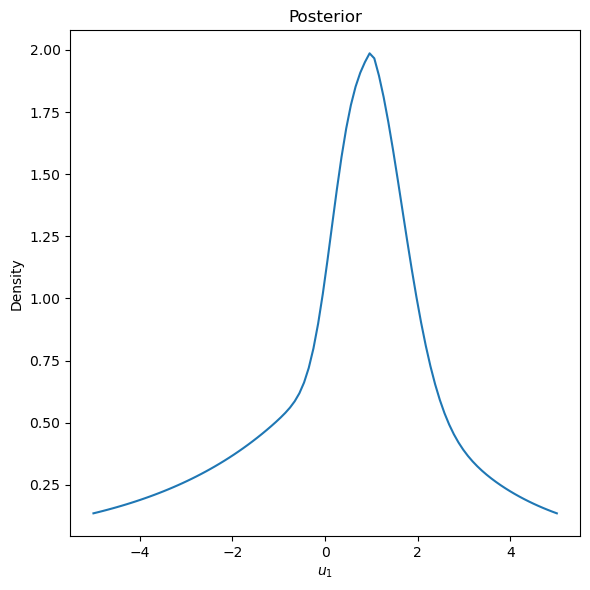

In [3]:
normal.visualize(ranges=[(-5, 5)])

### **Donut distribution (dim=2)**

In [4]:
# Inputs:
donut_dim = 2  # dimension of the parametr
donut_mu = np.array([0.5, 1.0])  # prior mean

donut_sigma = 1.0  # prior standard deviation
def donut_G(u):  # forward model
    return (u[0]**2+u[1]**2)

donut_y = 2.0  # observation
donut_gamma = 0.5  # noise standard deviation

def donut_posterior(u): # Unnormalized posterior
    return np.exp(-((donut_y-donut_G(u))**2)/(2*donut_gamma**2)-np.dot(u-donut_mu, u-donut_mu)/(2*donut_sigma**2))

# Sampling instace creation
donut = sp.Sampling(posterior=donut_posterior, parametr_dimension=donut_dim)

<class 'list'>


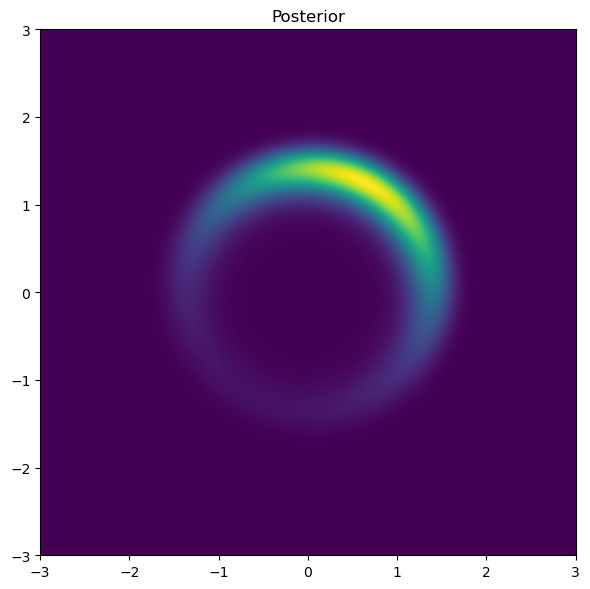

In [5]:
donut.visualize(max_points=1000, ranges=[(-3, 3), (-3, 3)])

### **Rosenbrock (Banana) distribution (dim=2)**

In [6]:
banana_dim = 2  # dimension of the parametr
banana_mu = np.array([1.0, 1.0])  # prior mean

banana_sigma = 1.0  # prior standard deviation
def banana_G(u):  # forward model
    a = 1.0
    b = 10.0
    return (a-u[0])**2 + b*(u[1]-(u[0])**2)**2

banana_y = 3.0  # observation
banana_gamma = 1.0  # noise standard deviation

def banana_posterior(u): # Unnormalized posterior
    return np.exp(-((banana_y-banana_G(u))**2)/(2*banana_gamma**2)-np.dot(u-banana_mu, u-banana_mu)/(2*banana_sigma**2))

# Sampling instace creation
banana = sp.Sampling(posterior=banana_posterior, parametr_dimension=banana_dim)

<class 'list'>


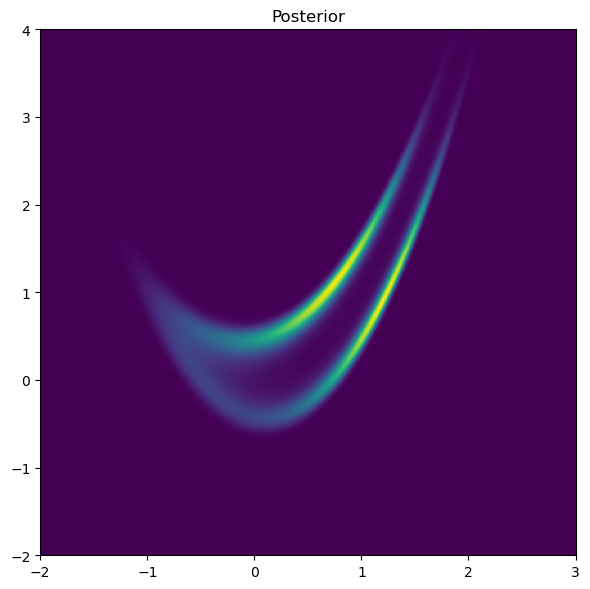

In [7]:
banana.visualize(max_points=1000, ranges=[(-2, 3), (-2, 4)])

### **Wave distribution (dim=2)**

In [8]:
# def hard_G(u):  # forward model
#    return np.sin(np.cos(np.tan(u[0]))) * np.sin(np.cos(np.tan(u[1])))

In [9]:
wave_dim = 2  # dimension of the parametr
wave_mu = np.array([0.0, 0.0])  # prior mean
wave_sigma = 50.0  # prior standard deviation

def wave_G(u):  # forward model
    a = 0.1
    b = 2.0
    c = 1.0
    d = 0.1
    return (a * np.sin(c * u[0])) + (b * np.cos(d * u[1]))

wave_y = 1.0  # observation
wave_gamma = 1.0  # noise standard deviation

def wave_posterior(u): # Unnormalized posterior
    return np.exp(-((wave_y-wave_G(u))**2)/(2*wave_gamma**2)-np.dot(u-wave_mu, u-wave_mu)/(2*wave_sigma**2))

# Sampling instace creation
wave = sp.Sampling(posterior=wave_posterior, parametr_dimension=wave_dim)

<class 'list'>


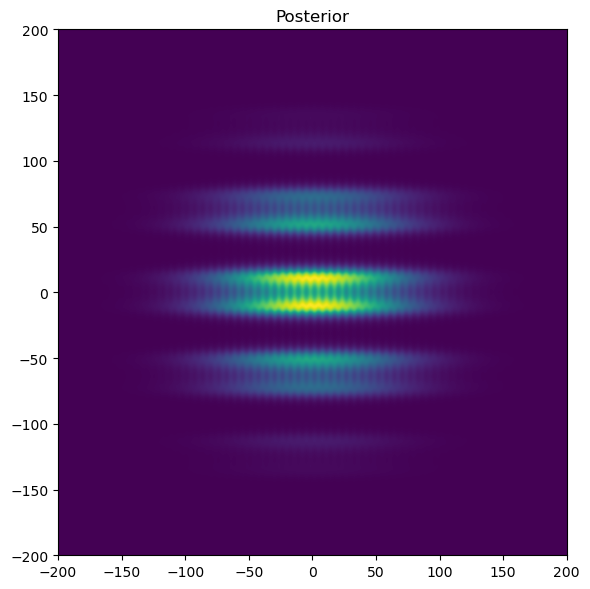

In [10]:
wave.visualize(max_points=1000, ranges=[(-200, 200), (-200, 200)])

In [11]:
multinormal_dim = 2  # dimension of the parametr
multinormal_mu = np.array([0.0, 0.0])  # prior mean
multinormal_sigma = 50.0  # prior standard deviation

def combined_normal_distribution(u):
    mean1 = np.array([-5, -5])
    mean2 = np.array([5, 5])
    cov = 2*np.eye(2)  # Identity matrix as covariance for simplicity

    # Calculate the probability density for each normal distribution
    prob1 = np.exp(-0.5 * np.dot((u - mean1).T, np.dot(np.linalg.inv(cov), (u - mean1))))
    prob2 = np.exp(-0.5 * np.dot((u - mean2).T, np.dot(np.linalg.inv(cov), (u - mean2))))

    # Combine the two distributions
    return prob1 + prob2

multinormal_y = 1.0  # observation
multinormal_gamma = 1.0  # noise standard deviation

def multinormal_posterior(u): # Unnormalized posterior
    return np.exp(-((multinormal_y-combined_normal_distribution(u))**2)/(2*multinormal_gamma**2)-
           np.dot(u-multinormal_mu, u-multinormal_mu)/(2*multinormal_sigma**2))

# Sampling instace creation
multinormal = sp.Sampling(posterior=combined_normal_distribution, parametr_dimension=multinormal_dim)

<class 'list'>


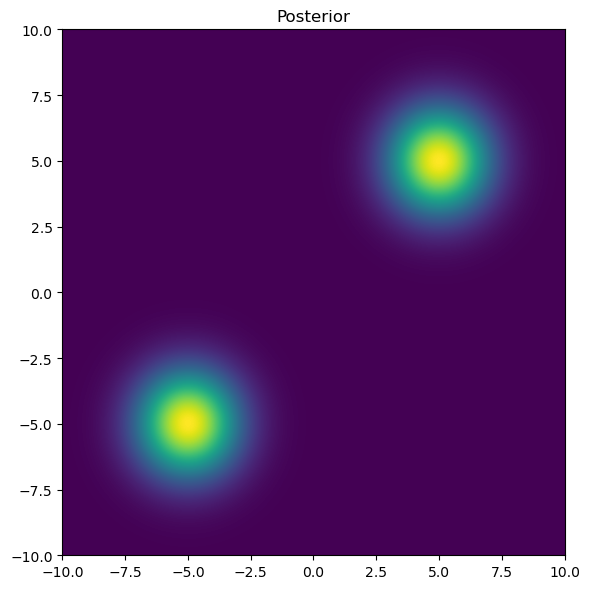

In [12]:
multinormal.visualize(max_points=1000, ranges=[(-10, 10), (-10, 10)])

## **Basic Metropolis-Hastings**

In this section we will test and visualize the results of MH method.

**MH parametrs for testing**

In [13]:
MH_N = 50000  # number of samples
def MH_proposal_distribution(mu): return np.random.normal(mu, 1.0)  # proposal distribution function
MH_burnin = 0.2 # burnin period

### **Modified Normal distribution (dim=1)**

**M_normal parametrs for testing**

In [14]:
normal_initial_MH = 1

**Calling the method**

In [15]:
normal_samples_MH = normal.MH(N=MH_N, 
                              initial=normal_initial_MH, 
                              proposal_distribution=MH_proposal_distribution, 
                              burnin=MH_burnin)

**Visualization of obtained samples**

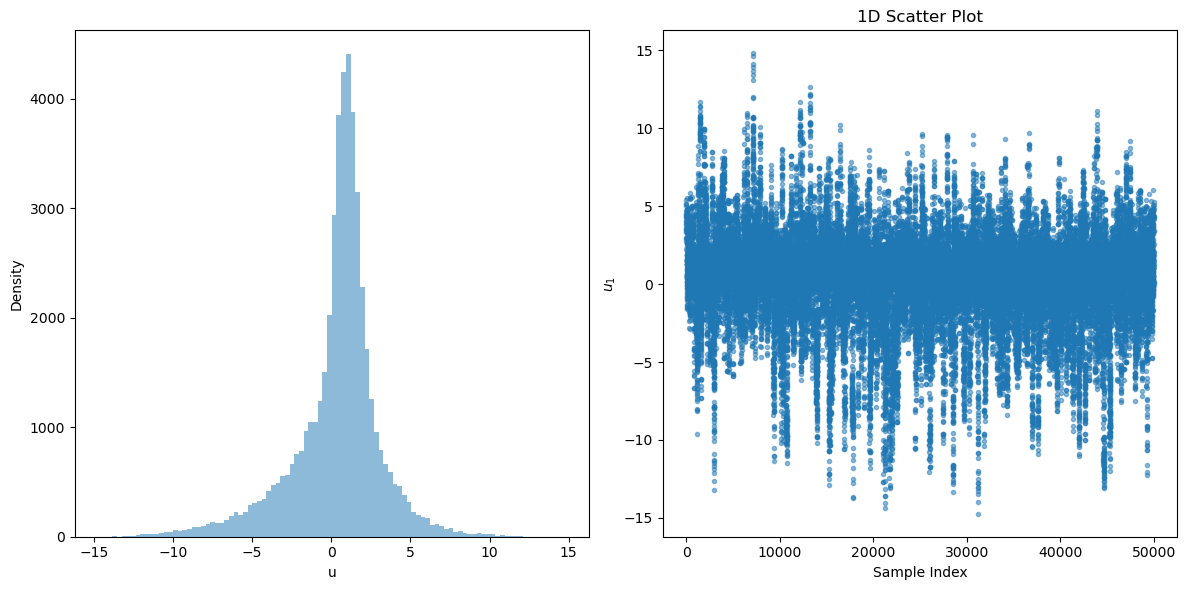

In [16]:
normal.visualize([normal_samples_MH])

### **Donut distribution (dim=2)**

**Donut parametrs for testing**

In [17]:
donut_initial_MH = np.array([2.0, 3.0])  # initial sample

**Calling the method**

In [18]:
donut_samples_MH = donut.MH(N=MH_N, 
                            initial=donut_initial_MH, 
                            proposal_distribution=MH_proposal_distribution, 
                            burnin=MH_burnin)

**Visualization of obtained samples**

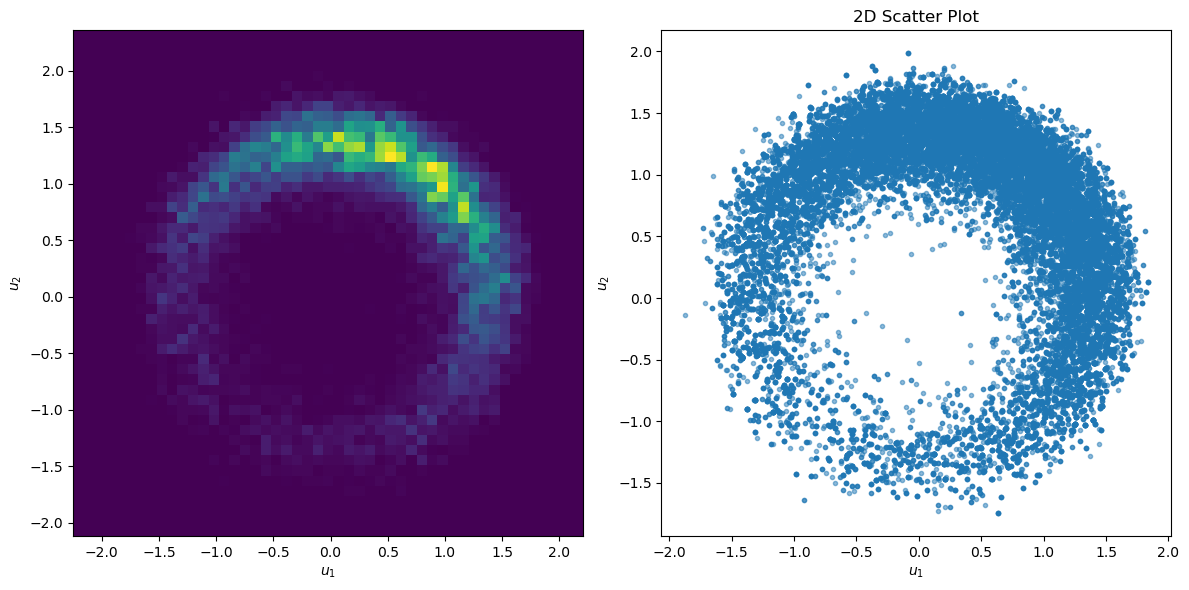

In [19]:
donut.visualize([donut_samples_MH])

**Quality of sampling method**

g:\ProgramFiles\VS_Code\Projects\BC\Codes\SamplingLIB.py:509: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


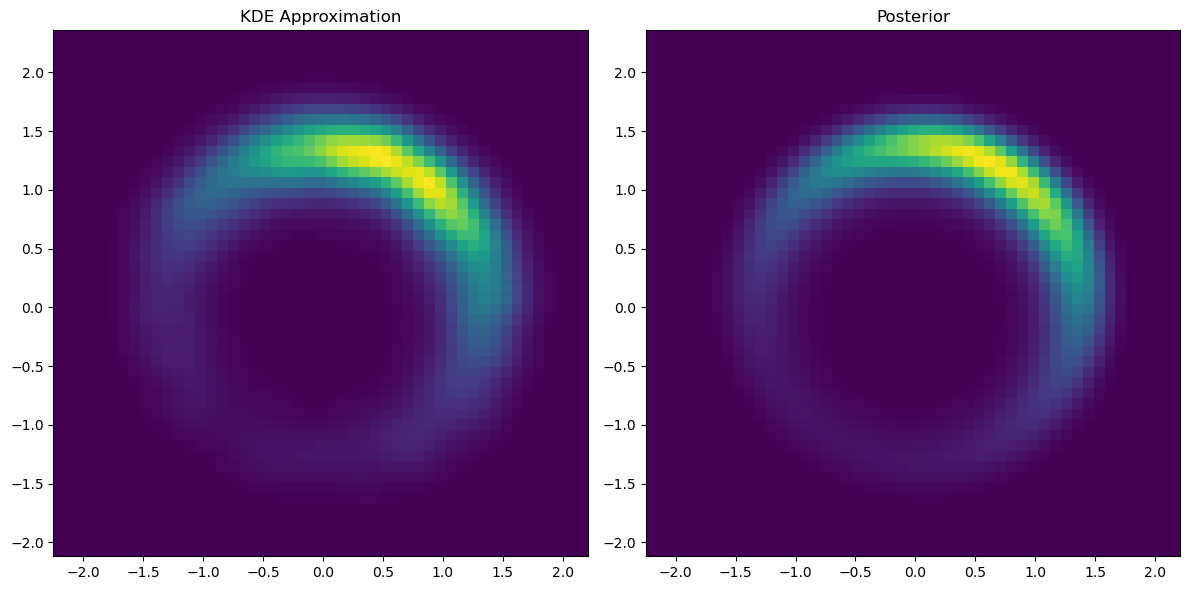

KL: 0.03905228857506343


In [20]:
print("KL:", donut.sampling_quality(donut_samples_MH, visualise=True))

In [21]:
multinormal_initial_MH = np.array([0.0, 0.0])  # initial sample

multinormal_samples_MH, multinormal_acc_rate_MH = multinormal.MH(N=MH_N, 
                                                                 initial=multinormal_initial_MH, 
                                                                 proposal_distribution=MH_proposal_distribution, 
                                                                 burnin=MH_burnin,
                                                                 acc_rate=True)

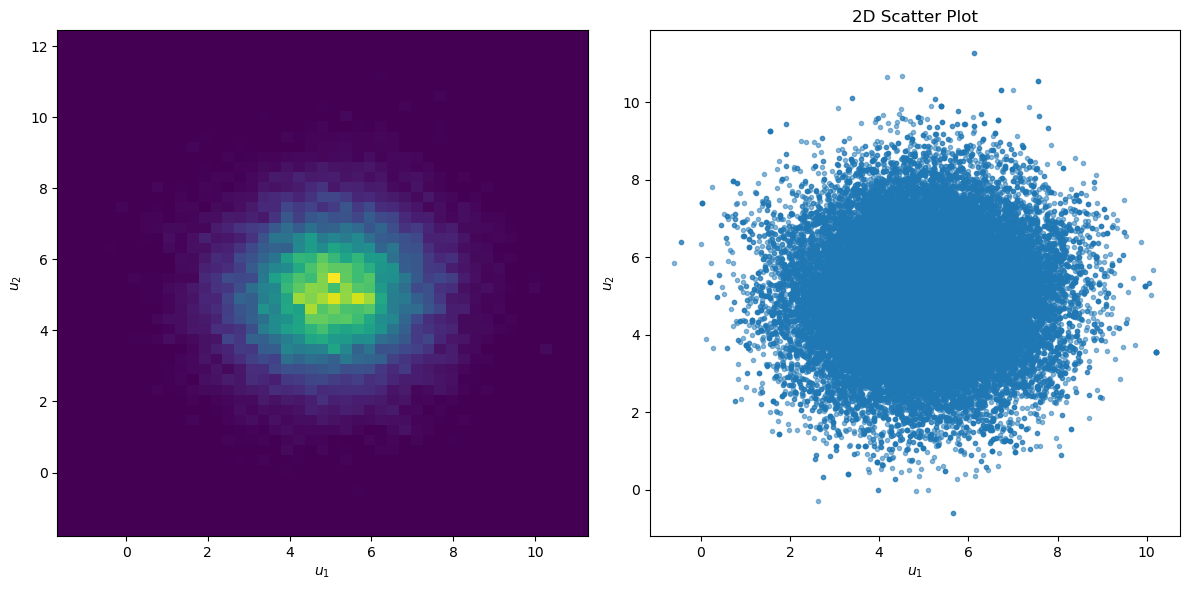

In [22]:
multinormal.visualize([multinormal_samples_MH])

In [23]:
multinormal_acc_rate_MH

0.7969

In [24]:
wave_initial_MH = np.array([0.0, 0.0])  # initial sample

wave_samples_MH, wave_acc_rate_MH = wave.MH(N=MH_N,
                                            initial=wave_initial_MH,
                                            proposal_distribution=MH_proposal_distribution,
                                            burnin=MH_burnin,
                                            acc_rate=True)

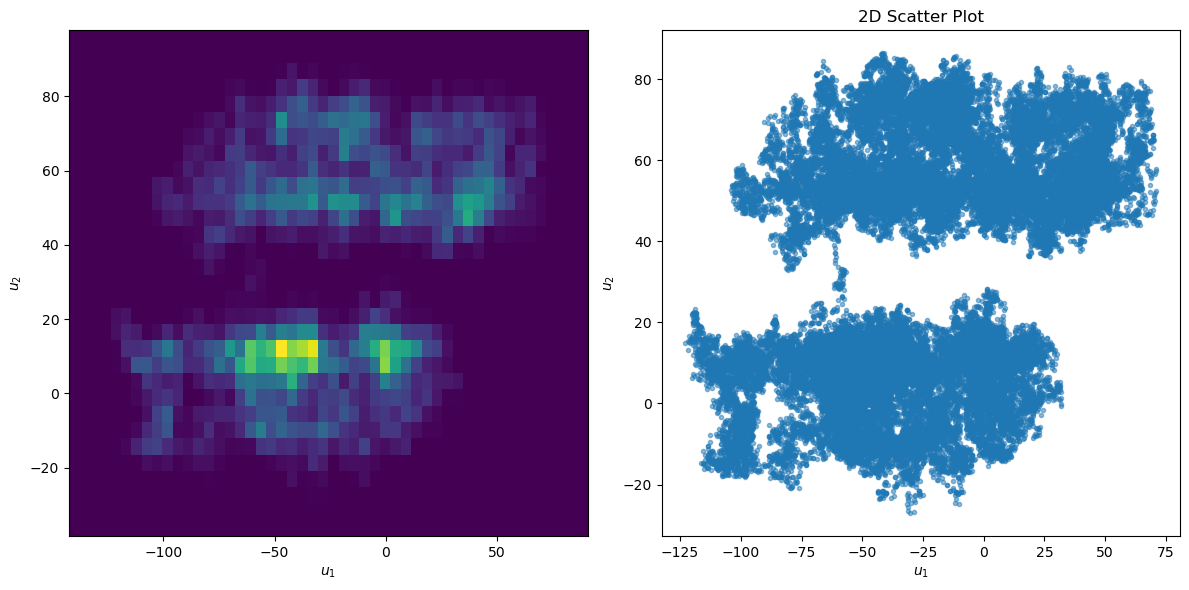

In [25]:
wave.visualize([wave_samples_MH])

### **Banana distribution (dim=2)**

**Banana parametrs for testing**

In [26]:
banana_initial_MH = np.array([2.0, 1.0])  # initial sample

**Calling the method**

In [47]:
banana_samples_MH, banana_acc_rate_MH = banana.MH(N=MH_N, 
                                                  initial=banana_initial_MH, 
                                                  proposal_distribution=MH_proposal_distribution, 
                                                  burnin=MH_burnin, 
                                                  acc_rate=True)

g:\ProgramFiles\VS_Code\Projects\BC\Codes\SamplingLIB.py:102: RuntimeWarning: divide by zero encountered in scalar divide
  acceptance_probability = min(1, proposal_likelihood / current_likelihood)


**Visualization of obtained samples**

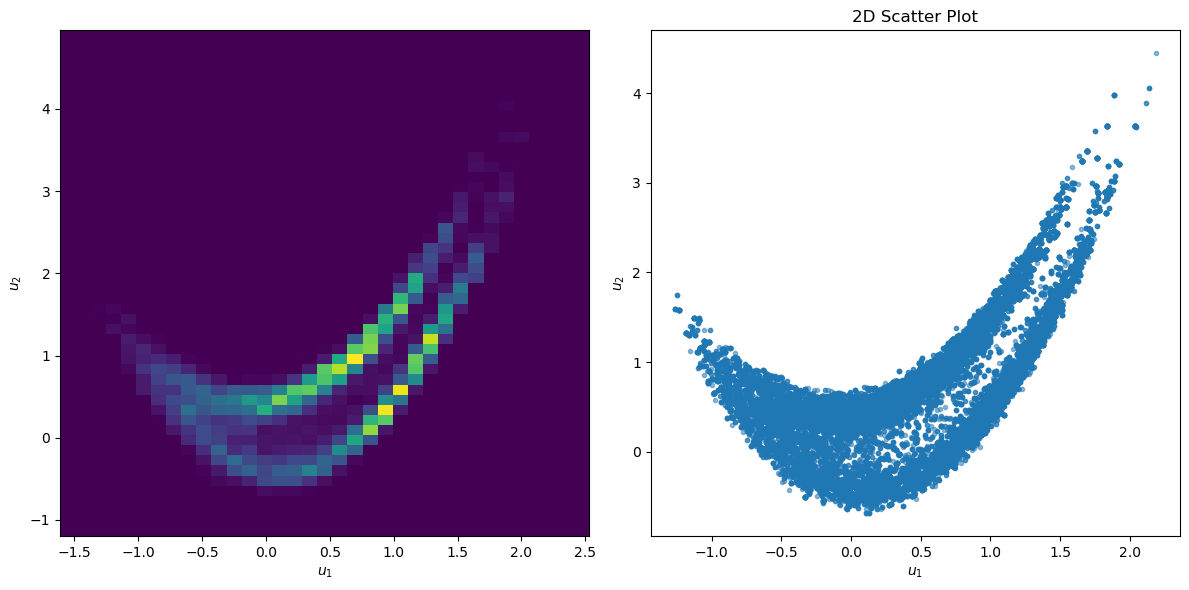

In [48]:
banana.visualize(visuals=[banana_samples_MH])

**Quality of sampling method**

g:\ProgramFiles\VS_Code\Projects\BC\Codes\SamplingLIB.py:509: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


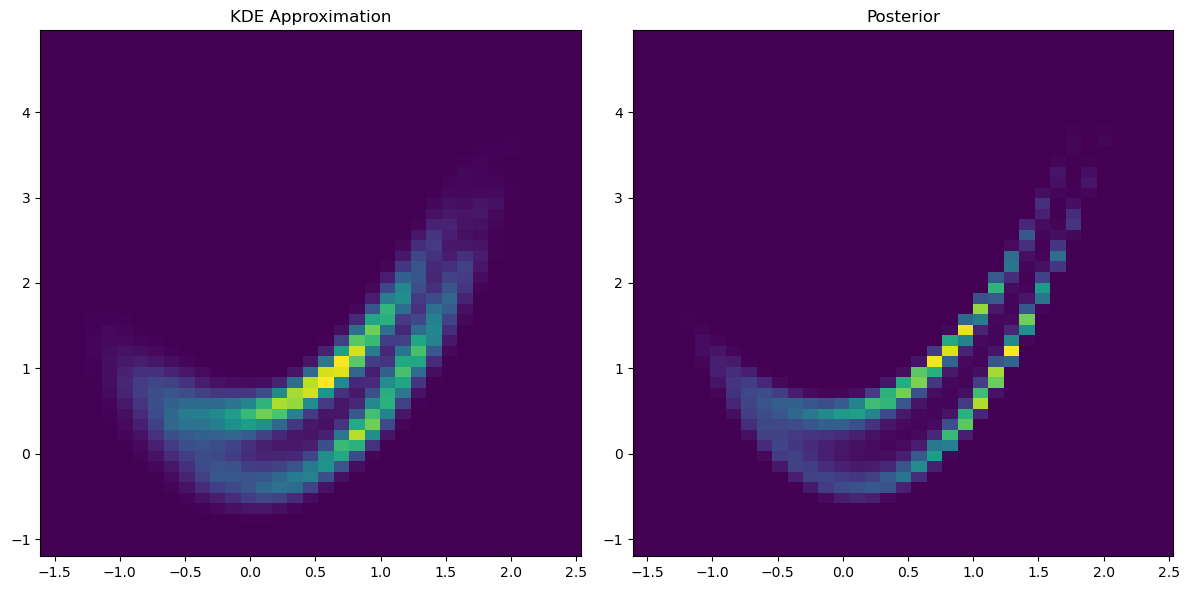

KL: 0.24592969537372641


In [49]:
print("KL:", banana.sampling_quality(banana_samples_MH, visualise=True))

**Eficiency of the sampling method**

In [50]:
print("Acceptance rate for the banana distribution: ", banana_acc_rate_MH * 100, "%")

Acceptance rate for the banana distribution:  16.714000000000002 %


## **Adaptive Metropolis**

### **Banana distribution (dim=2)**

**Banana parametrs for testing**

In [51]:
banana_initial_AM = np.array([2.0, 3.0])  # initial sample

**Calling the method**

In [52]:
banana_samples_AM, banana_acc_rate_AM, banana_cov_AM = banana.AM(N=MH_N, 
                                                                 initial=banana_initial_AM, 
                                                                 proposal_cov=np.eye(banana_dim), 
                                                                 burnin=MH_burnin,
                                                                 acc_rate=True,
                                                                 cov_matrix=True)

**Visualization of obtained samples**

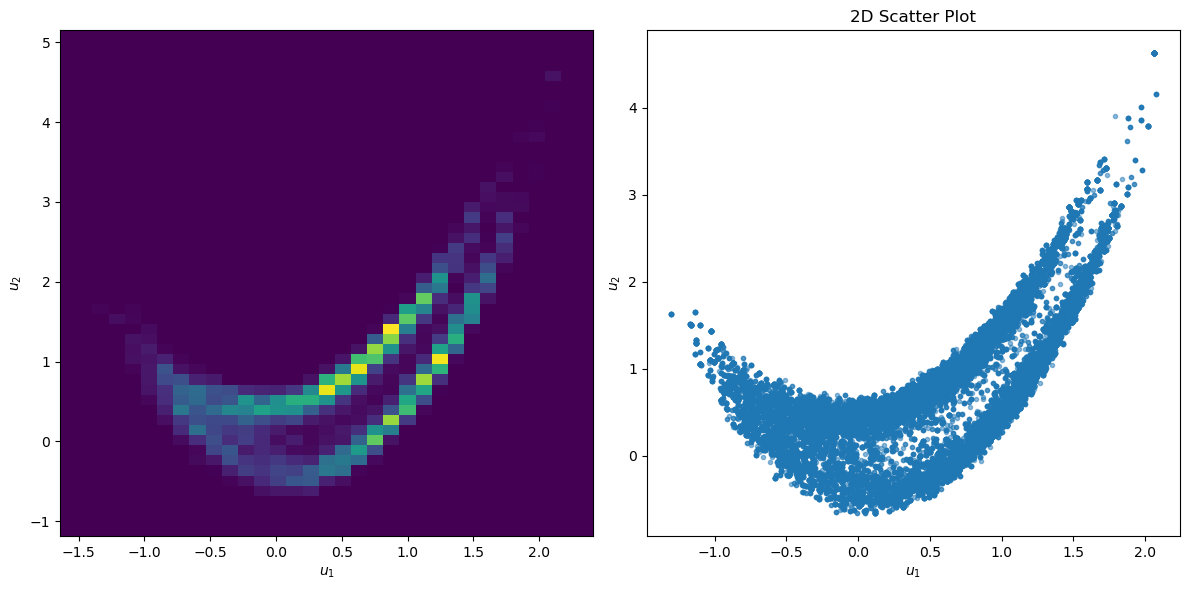

In [53]:
banana.visualize(visuals=[banana_samples_AM])

**Quality of sampling method**

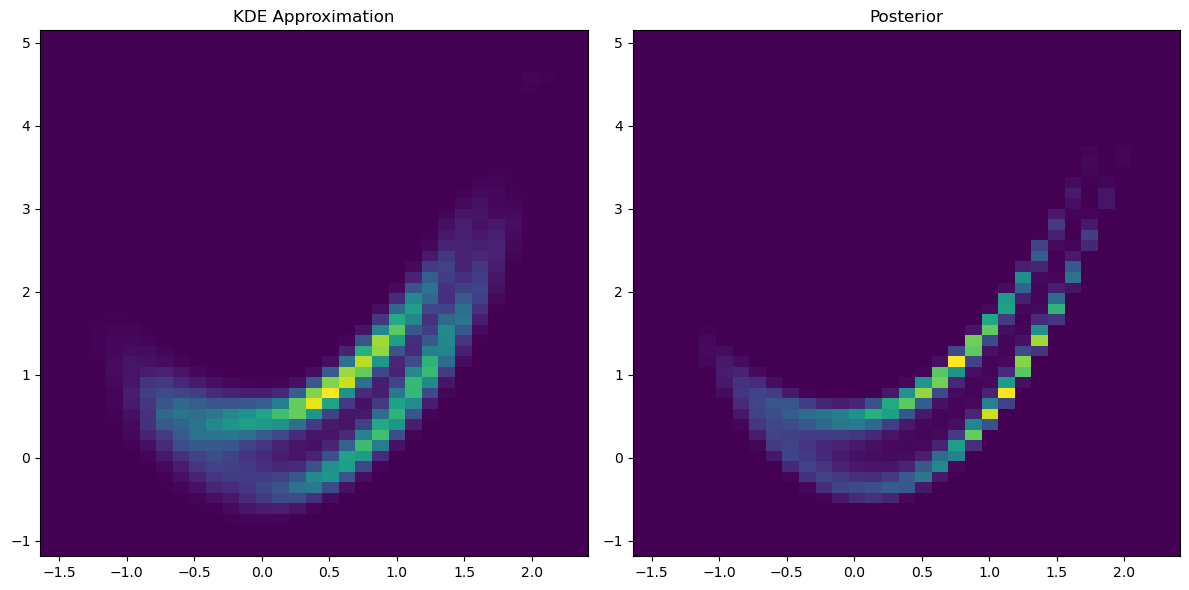

KL: 0.2518832112282167


In [54]:
print("KL:", banana.sampling_quality(banana_samples_AM, visualise=True))

**Efficienty of the sampling method**

In [55]:
print("Acceptance rate for the banana distribution: ", banana_acc_rate_AM * 100, "%")

Acceptance rate for the banana distribution:  15.802 %


In [57]:
banana_AM = banana.AM2(burnin=0.2)

In [58]:
banana_AM.sample(N=MH_N, x0=banana_initial_AM)

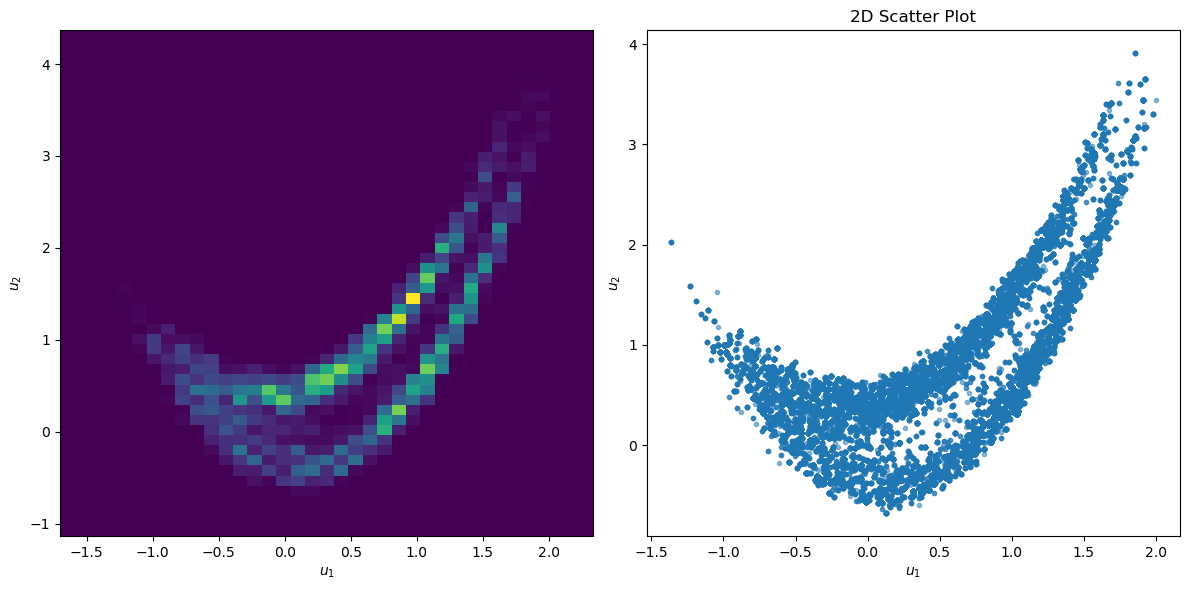

In [59]:
banana_AM.visualize([banana_AM.samples])

g:\ProgramFiles\VS_Code\Projects\BC\Codes\SamplingLIB.py:509: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


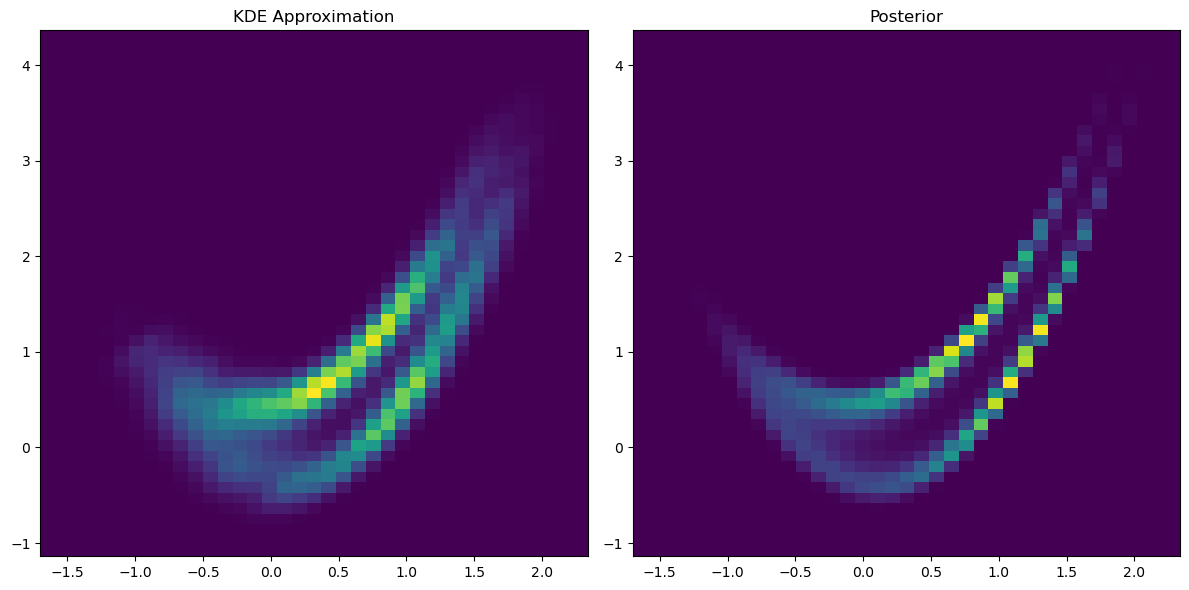

KL: 0.25126219467000777


In [60]:
print("KL:", banana_AM.sampling_quality(banana_AM.samples, visualise=True))

In [61]:
print("Acceptance rate for the banana distribution: ", banana_AM.acc_rate * 100, "%")

Acceptance rate for the banana distribution:  7.576 %


In [ ]:
raise KeyboardInterrupt("Execution stopped intentionally.")

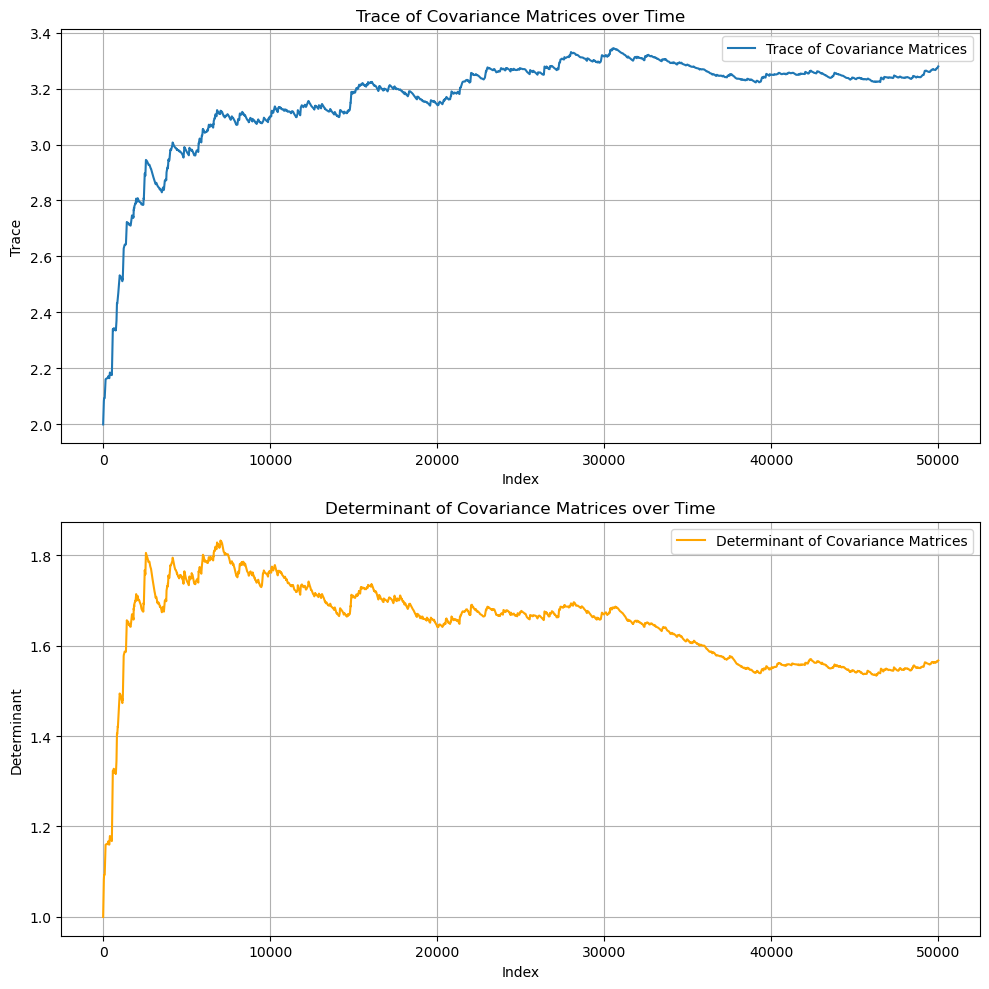

In [64]:
# Compute the trace of each covariance matrix
traces = [np.trace(matrix) for matrix in banana_AM.C]

# Compute the determinant of each covariance matrix (optional)
determinants = [np.linalg.det(matrix) for matrix in banana_AM.C]

# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot the trace of each covariance matrix
axs[0].plot(traces, label='Trace of Covariance Matrices')
axs[0].set_title('Trace of Covariance Matrices over Time')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Trace')
axs[0].legend()
axs[0].grid(True)

# Plot the determinant of each covariance matrix
axs[1].plot(determinants, label='Determinant of Covariance Matrices', color='orange')
axs[1].set_title('Determinant of Covariance Matrices over Time')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Determinant')
axs[1].legend()
axs[1].grid(True)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## **DRAM**

### **Banana distribution (dim=2)**

**Banana parametrs for testing**

In [28]:
banana_initial_DRAM = np.array([2.0, 1.0])  # initial sample

In [ ]:
banana_samples_DRAM, banana_acc_rate_DRAM, banana_cov_DRAM = banana.DRAM(N=MH_N, 
                                                                         initial=banana_initial_DRAM, 
                                                                         proposal_cov=np.eye(banana_dim), 
                                                                         burnin=MH_burnin,
                                                                         acc_rate=True,
                                                                         cov_matrix=True)

**Visualization of obtained samples**

In [ ]:
banana.visualize([banana_samples_DRAM])

## **DREAM**

### **Donut distribution (dim=2)**

In [32]:
donut_initial_DREAM = np.random.rand(10, 2)  # initial sample

In [33]:
donut_samples_DREAM, donut_acc_rate_DREAM = donut.DREAM(N=MH_N//5, 
                                                        initial=donut_initial_DREAM, 
                                                        burnin=MH_burnin,
                                                        delta=3,
                                                        CR=0.9,
                                                        chains=10)

In [ ]:
print("Acceptance rates: ", donut_acc_rate_DREAM)

In [ ]:
donut.visualize(visuals=[donut_samples_DREAM.transpose(1, 0, 2).reshape(-1, donut_dim)])

In [ ]:
print("KL:", donut.sampling_quality(donut_samples_DREAM.transpose(1, 0, 2).reshape(-1, donut_dim), visualise=True))

In [ ]:
donut.visualize([donut_samples_DREAM[:,9,:]])

### **Wave distribution (dim=2)**

In [48]:
wave_initial_DREAM = np.random.rand(10, 2)  # initial sample

In [49]:
wave_samples_DREAM, wave_acc_rate_DREAM = wave.DREAM(N=MH_N//5, 
                                                     initial=wave_initial_DREAM, 
                                                     burnin=MH_burnin,
                                                     delta=3,
                                                     CR=0.9,
                                                     chains=10)

In [ ]:
wave.visualize(visuals=[wave_samples_DREAM.transpose(1, 0, 2).reshape(-1, wave_dim)])

In [ ]:
print("Acceptance rates: ", wave_acc_rate_DREAM)

In [ ]:
wave.sampling_quality(wave_samples_DREAM.transpose(1, 0, 2).reshape(-1, donut_dim), visualise=True)

In [53]:
multinormal_initial_DREAM = np.random.rand(10, 2)  # initial sample

In [54]:
multinormal_samples_DREAM, multinormal_acc_rate_DREAM = multinormal.DREAM(N=MH_N//5, 
                                                                        initial=multinormal_initial_DREAM, 
                                                                        burnin=MH_burnin,
                                                                        delta=3,
                                                                        CR=0.9,
                                                                        chains=10)

In [ ]:
multinormal.visualize(visuals=[multinormal_samples_DREAM])

In [ ]:
print("Acceptance rates: ", multinormal_acc_rate_DREAM)

In [ ]:
multinormal.sampling_quality(multinormal_samples_DREAM.transpose(1, 0, 2).reshape(-1, multinormal_dim), visualise=True)

In [ ]:
# Generate mock samples from your algorithm (e.g., AM or DREAM)
samples = np.random.randn(1000, 2)
kde_value = donut.sampling_quality(samples, True)

print(f"KDE L2 Norm: {kde_value:.4f}")

In [ ]:
# Check similarity using different methods
kde_value = donut.sampling_quality(donut_samples_MH, True)

print(f"KDE L2 Norm: {kde_value:.4f}")

In [ ]:
# Example usage (if part of a class)
wave.animate_chain_movement(wave_samples_DREAM, chain=0, subsample_rate=100, interval=20)

# NOTES

- sampling_quality
    - create for N dimensions --- (done)
    - fix grid for sampling quality
- remake visualize function
    - split into subfunctions --- (done)
    - fix smaller issues --- (done)
    - easy to call --- (done)
    - adapt for Sampling algorithm classes
- remake sampling algorithms into classes --- (working)
    - remake AM --- (done)
        - fix recursive formula in AM --- (done)
    - reamke DRAM --- (done)
        - add i-th stage proposal for DRAM --- (done)
        - fix acceptance_probability --- (done)
    - remake DREAM
    - remake MH
- fix animate function --- (done)
- update function descriptions --- (done)
- create high dimension distribution (multi-normal prolly)
- create easy to use benchmark for each and all sampling algorithms
    - add ESS metric
